In [2]:
from sys import path as spth
spth.append('/nsls2/users/jli1/mlibrary/RunningVersion_NewJupyter/')
from os import (chdir,getcwd)
chdir('/nsls2/users/jli1/mlibrary/RunningVersion_NewJupyter/')
from os import path as os_path
from importlib import reload
import numpy as np
from time import strftime
from timeit import default_timer as de_time
from h5py import File as h5_file
from glob import glob as globf
import matplotlib.pyplot as plt
%matplotlib widget
###############################################
from databroker import Broker
db = Broker.named('six')
sample = None
#################################################################
from Loc_Funcs import (six_data,print_data,scan_info)
import six_plot as splt 
reload(splt)
#################################################################
E_cali_O = 14.07 # meV/pixel at O K-edge
E_cali_Fe = 21.77 # meV/pixel at Fe L-edge
E_cali_Cu = 33.14 # meV/pixel at Cu L-edge
E_cali_N = 9.2 # meV/pixel at N K-edge
E_cali_Ni = 28.95 # meV/pixel at Ni L-edge

Tiled version 0.1.0a120


# Motor Scan Plot

It is loading the scan: six-149512


Output()



It takes 15.791475430130959 seconds to load all these scans!


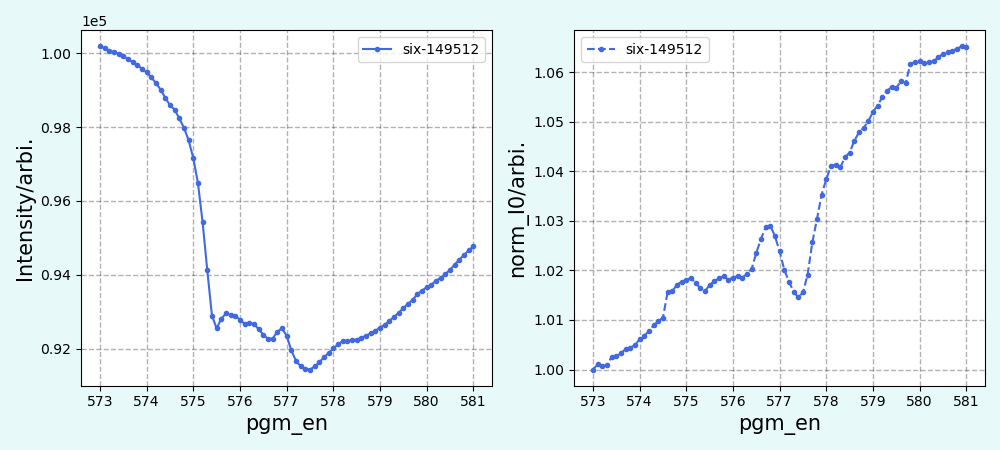

In [3]:
# scan = np.array([157775]) # grid_scan
# scan = np.array([123355]) # XAS with rixscam
scan = np.array([123355,148783,148785,157775]) # multiple scans

scan = np.array([160491,160492]) # XAS with ring_current

scan = np.array([149512])
######################################################
sample=sample # sample name
######################################################
start_time = de_time()
splt.scan_plot(scan,plt_close=0,sample=sample)
##############################################################################################
end_time = de_time()
print('\n')
print('It takes {} seconds to load all these scans!'.format((end_time - start_time)))
fig = plt.gcf()
fig.tight_layout()

# Load all RIXS data into working space

In [4]:
scan_set = np.arange(141861,141866+1,1)
# scan_set = np.array([158272,158279,158286,158294,158301])


# scan_set = np.arange(200167,200172+1,1)

print(scan_set)
#############################################################################################################
E_cali = E_cali_O
#############################################################################################################
start_time = de_time()
raw_data = six_data(scan_set,E_cali=E_cali)
##############################################################################################
print_data(raw_data,scan=scan_set)
print('***************************************************************************************************************')
print('All scans have been loaded into the working space!')
end_time = de_time()
print('\n')
print('It takes {:.2f} seconds to load these scans!'.format((end_time - start_time)))

[141861 141862 141863 141864 141865 141866]
--- six-141861 --- points 120 --- split time 5.0s --- total 600.0s --- duration 711.2s --- when Mon May 23 15:31:53 2022
--- six-141862 --- points 120 --- split time 5.0s --- total 600.0s --- duration 714.5s --- when Mon May 23 15:43:47 2022
--- six-141863 --- points 120 --- split time 5.0s --- total 600.0s --- duration 711.7s --- when Mon May 23 15:55:45 2022
--- six-141864 --- points 120 --- split time 5.0s --- total 600.0s --- duration 712.6s --- when Mon May 23 16:07:39 2022
--- six-141865 --- points 120 --- split time 5.0s --- total 600.0s --- duration 710.7s --- when Mon May 23 16:19:35 2022
--- six-141866 --- points 120 --- split time 5.0s --- total 600.0s --- duration 710.5s --- when Mon May 23 16:31:29 2022
+-----------+-------------+------------------+--------------------+----------------------+----------------+-----------+
| Scan Num. | Theta (deg) | Inc. Energy (eV) |    2Theta (deg)    | Polarization (phase) | Exit Slit (um) | Te

# Browse raw data

Output()

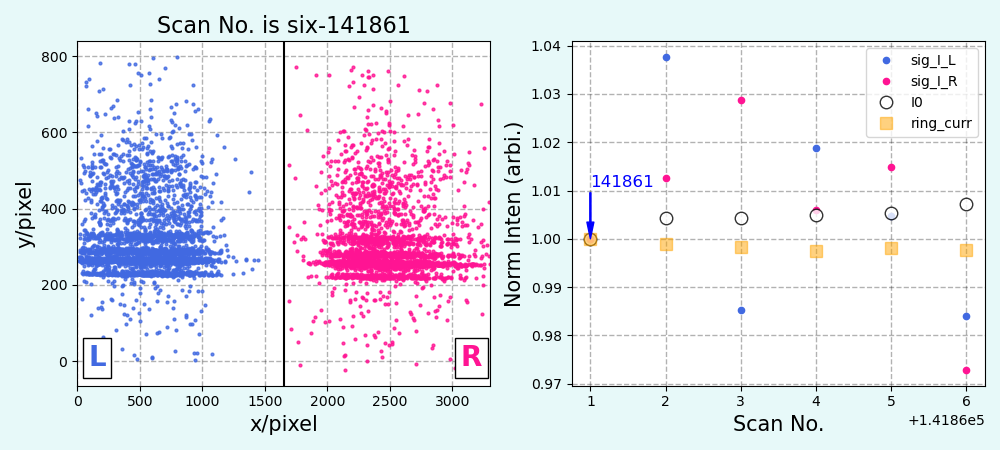

In [5]:
scan_rixs = scan_set[:]
######################################################################################
sig_roi=[] # Array with up to 4 elements :[left_edge for left sensor,right_edge for left sensor,
                   # left_edge for right sensor,right_edge for right sensor], the region of interest for signal.
######################################################################################
data = splt.raw_sig(raw_data,*tuple(sig_roi),scan=scan_rixs,plt_close=1) 
fig = plt.gcf()
fig.tight_layout()

# Check slope for pseudo-2D signal

Output()

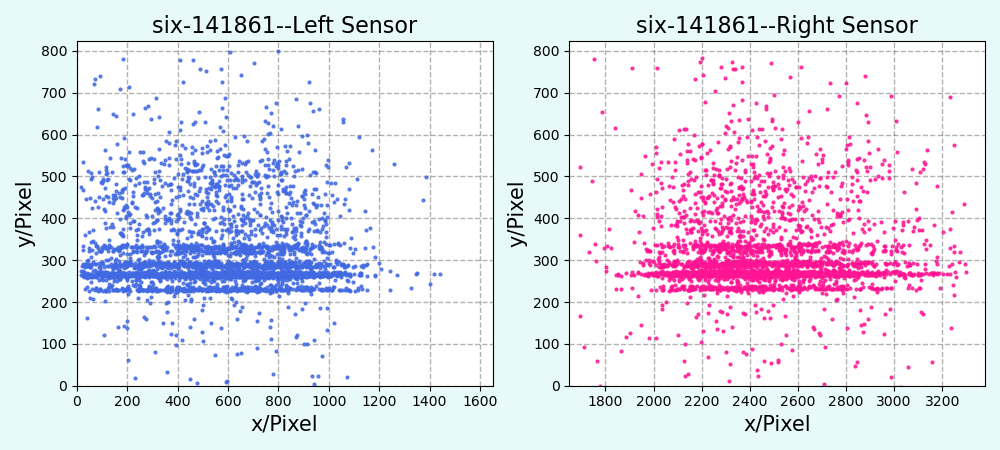

In [7]:
slope_l=-0.00133042
slope_r=-0.00479552

########################################################################
slope_dict=splt.check_slope(data,scan=scan_rixs,
                            slope_l=slope_l,slope_r=slope_r,
                            plt_close=1)
fig = plt.gcf()
fig.tight_layout()

# Handle the statistics and resolution ---> points_per_pixel

-0.0013304200000000717 -0.004795520000000046


Output()

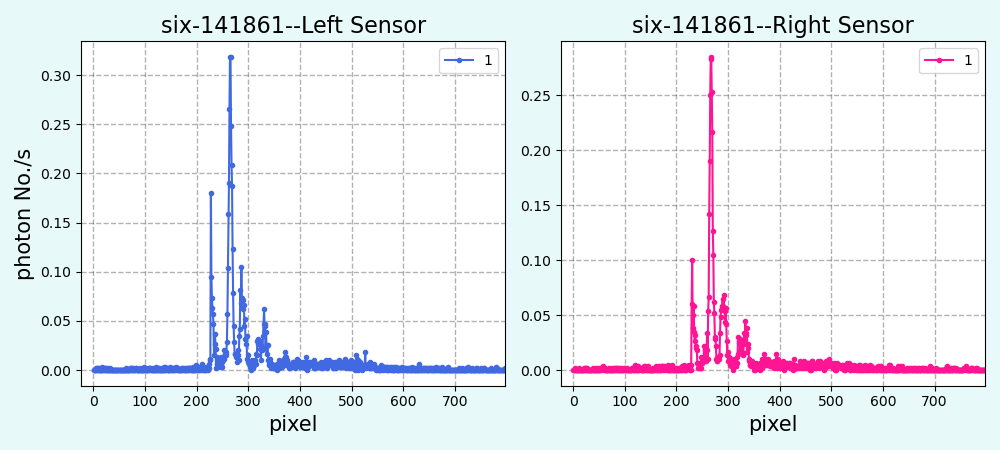

In [8]:
slope_l = slope_dict['slope_l'].get_interact_value()
slope_r = slope_dict['slope_r'].get_interact_value()

print(slope_l,slope_r)

########################################################################
stat_dict = splt.stat_plot(data,scan=scan_rixs,
                           slope_l=slope_l,slope_r=slope_r,
                           plt_close=1)
fig = plt.gcf()
fig.tight_layout()

# Check the correlation between different scans

Output()

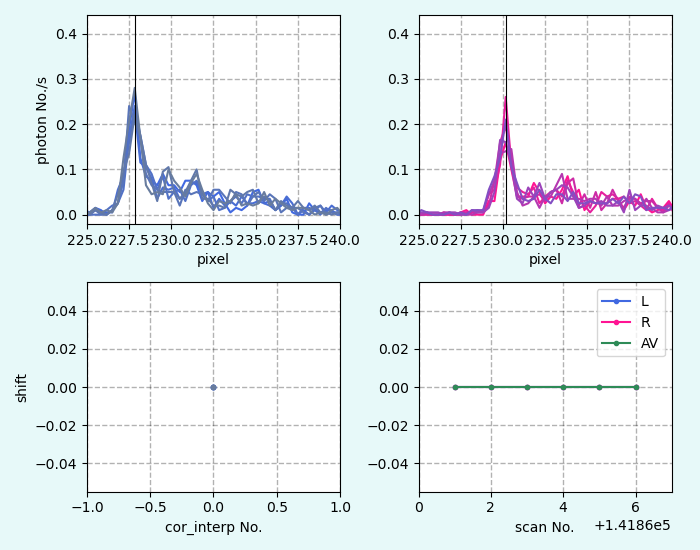

In [10]:
slope_l = slope_dict['slope_l'].get_interact_value()
slope_r = slope_dict['slope_r'].get_interact_value()
points_per_pixel_cor = stat_dict['points_per_pixel_cor'].get_interact_value()

####################################
cor_roi = np.array([[225,240],[225,240]]) 

########################################################################
cor_dict = splt.check_cor(data,scan=scan_rixs,
                slope_l=slope_l,slope_r=slope_r,points_per_pixel=points_per_pixel_cor,
                 cor_roi = cor_roi,
                plt_close=1)
########################################################################
fig = plt.gcf()
fig.tight_layout()

# Check spectra after correlated shifts

self


Output()

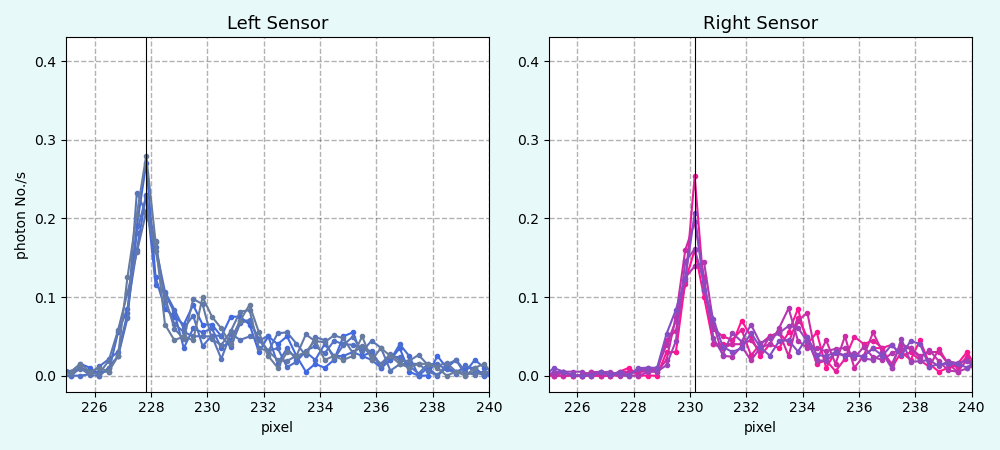

In [11]:
slope_l = slope_dict['slope_l'].get_interact_value()
slope_r = slope_dict['slope_r'].get_interact_value()
points_per_pixel = stat_dict['points_per_pixel_cor'].get_interact_value()
####################################################################################
cor_roi_l = [cor_dict['xlow_l'].get_interact_value(),cor_dict['xhigh_l'].get_interact_value()]
cor_roi_r = [cor_dict['xlow_r'].get_interact_value(),cor_dict['xhigh_r'].get_interact_value()]
cor_interp=cor_dict['cor_interp'].get_interact_value()
shift_type=cor_dict['shift_type'].get_interact_value()
print(shift_type)
########################################################################
splt.check_spec_shift(data, scan=scan_rixs,
                    slope_l=slope_l, slope_r=slope_r, points_per_pixel=points_per_pixel,
                    cor_roi_l=cor_roi_l,cor_roi_r=cor_roi_r,cor_interp=cor_interp,shift_type=shift_type,
                    plt_close=1)
##############################################
fig = plt.gcf()
fig.tight_layout()

# Perform correlation between different sensors (left and right) leading to the sum and save data!

self


Output()

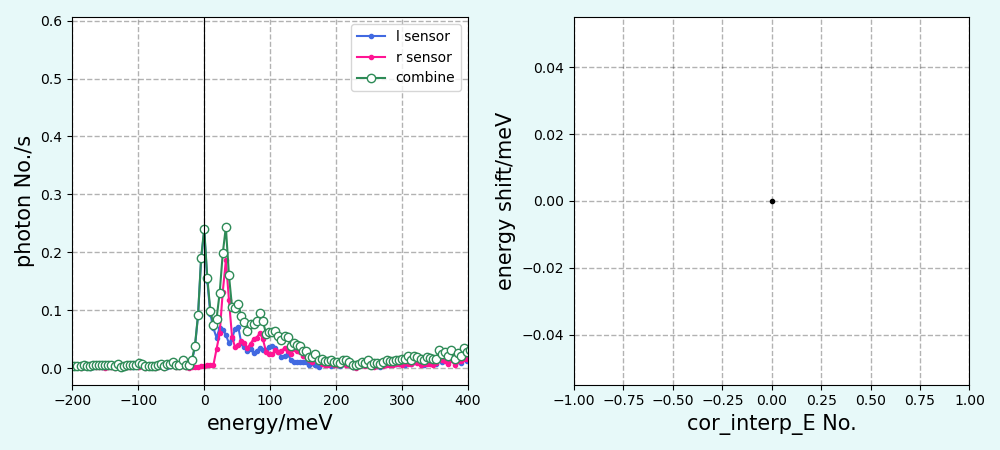

In [12]:
slope_l = slope_dict['slope_l'].get_interact_value()
slope_r = slope_dict['slope_r'].get_interact_value()
points_per_pixel = stat_dict['points_per_pixel_cor'].get_interact_value()

####################################################################################
cor_roi_l = [cor_dict['xlow_l'].get_interact_value(),cor_dict['xhigh_l'].get_interact_value()]
cor_roi_r = [cor_dict['xlow_r'].get_interact_value(),cor_dict['xhigh_r'].get_interact_value()]
cor_interp=cor_dict['cor_interp'].get_interact_value()
shift_type=cor_dict['shift_type'].get_interact_value()
print(shift_type)
########################################################################
splt.spec_cor(data, scan=scan_rixs,sample=sample,
              slope_l=slope_l, slope_r=slope_r, points_per_pixel=points_per_pixel,
              cor_roi_l=cor_roi_l,cor_roi_r=cor_roi_r,cor_interp=cor_interp,
              shift_type=shift_type,
              plt_close=1)
##############################################
fig = plt.gcf()
fig.tight_layout()

# Display RIXS Spectra

Output()

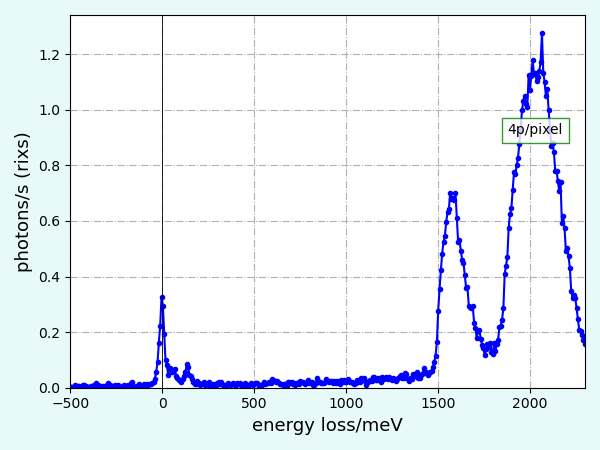

In [18]:
points_per_pixel = 4
data_folder =getcwd()+'/Data/points_per_pixel-'+str(points_per_pixel)+'/'
######################################################
# scan = np.hstack((np.arange(112425,112443+1,1),np.arange(112445,112448+1,1))) 

scan = np.array([158272])

# scan_set = np.arange(125510,125515+1,1)

data_type = 'hdf' # it can be 'hdf' or 'txt'
#############################################################################################################
# plt.close()
# fig = plt.figure('Display RIXS Map', figsize=(3, 7))
splt.rixs1d(data_folder=data_folder,scan=scan,data_type=data_type,sample=sample,fig=None,plt_close=1)
fig = plt.gcf()
fig.tight_layout()

# Display RIXS Map --> Only work for .hdf files

/nsls2/users/jli1/mlibrary/RunningVersion_NewJupyter/Data/points_per_pixel-3/RawData/six-158272.hdf
/nsls2/users/jli1/mlibrary/RunningVersion_NewJupyter/Data/points_per_pixel-3/RawData/six-158279.hdf
/nsls2/users/jli1/mlibrary/RunningVersion_NewJupyter/Data/points_per_pixel-3/RawData/six-158286.hdf
/nsls2/users/jli1/mlibrary/RunningVersion_NewJupyter/Data/points_per_pixel-3/RawData/six-158294.hdf
/nsls2/users/jli1/mlibrary/RunningVersion_NewJupyter/Data/points_per_pixel-3/RawData/six-158301.hdf


Output()

/tmp/ipykernel_45091/1941706938.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


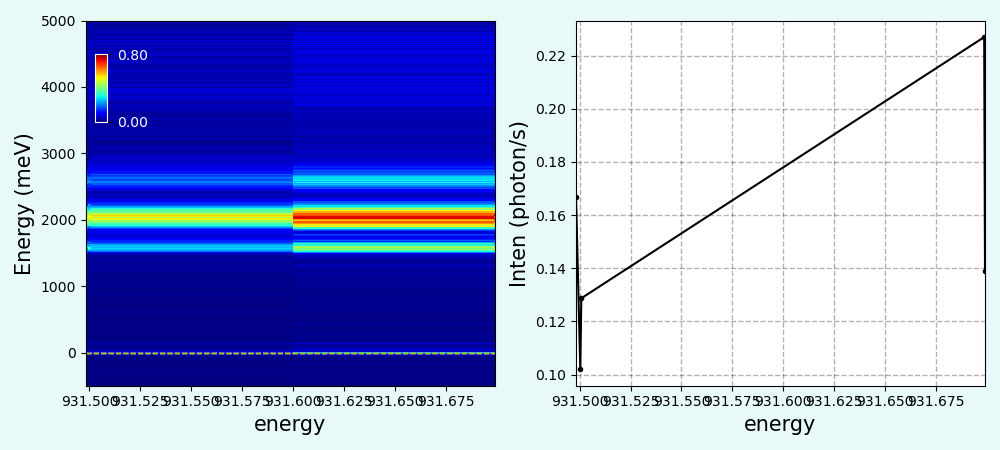

In [19]:
points_per_pixel = 3
data_folder =getcwd()+'/Data/points_per_pixel-'+str(points_per_pixel)+'/RawData/'
######################################################
scan = np.array([158272,158279,158286,158294,158301])


#########################################
vari = 'energy' # This parameter can be 'energy' (incident photon energy) or 'th'.
vari_offset = 0 # The potential offset for vari
cut_type = 'H' # There are two choices: 'H' or 'V' !!!
#############################################################################################################
# plt.close('all')
# fig = plt.figure('Display RIXS Map', figsize=(8, 6.))
splt.rixs2d(data_folder=data_folder,scan=scan,sample=sample,
            vari=vari,vari_offset = vari_offset,cut_type=cut_type,
            colormap='jet',fig=None,plt_close=1)
fig = plt.gcf()
fig.tight_layout()

# Print data information --> Only work for .hdf files

In [ ]:
points_per_pixel = 2.5
data_folder =getcwd()+'/Data/points_per_pixel-'+str(points_per_pixel)+'/RawData/'
######################################################
scan = np.arange(141861,141864+1,1) # E-dep at T=300K & LH

#############################################################
disp = ['x','y'] # The element can be any items in the meta of .hdf file.
#############################################################################################################
scan_info(data_folder,scan=scan,sample=sample,disp=disp)

# Extract the meta-data --> Only work for .hdf files

In [ ]:
points_per_pixel = 2.5
data_folder =getcwd()+'/Data/points_per_pixel-'+str(points_per_pixel)+'/RawData/'
######################################################
scan = np.arange(141861,141864+1,1) # E-dep at T=300K & LH



#########################################
meta='th' # It must be specified and one numerical item in the meta of .hdf file.
#############################################################################################################
# plt.close('all')
# fig = plt.figure('Display RIXS Map', figsize=(7, 4.5))
splt.meta_plot(data_folder=data_folder,scan=scan,sample=sample,
                meta=meta,fig=None,plt_close=1)
fig = plt.gcf()
fig.tight_layout()

# Self-plot --> XAS

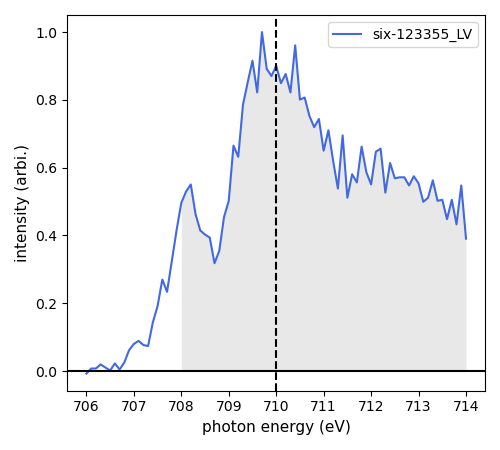

In [28]:
data_folder = getcwd()+'/Data/'
#################################################################

scan = np.array([123355])
labels = ['LV','LH']

xshift=[0,0.0]


rescale=1

sig = 'rixscam' # The channel for signal, can be rixscam, sclr_channels_chan2, sclr_channels_chan6...
#################################################################

colors = ['royalblue','deeppink','brown','seagreen','deeppink','olive']
#################################################################3
plt.close('all')
fig = plt.figure(strftime("%Y %b %d  %H:%M:%S"),figsize=(5.,4.5))
ax = fig.add_subplot(111)
#################################################################
for i,n in enumerate(scan):
    if sample is None:
        sample='six'
    data = h5_file(data_folder + sample+'-' + str(int(n))+'.hdf','r')
    vari = [k for k in data['data'].keys() if k[:4] not in ['sclr','rixs','ring']]
    #################################################################
    I = data['data'][sig][:,0]
    E = data['data'][vari[0]][:,0]
    #################################################################
    if rescale==1:
        I-=(np.mean(I[:2]))
        I/=I.max()
    else:
        pass
    
    if i==0:
        I_ref = I
        E_ref = E
        
    ax.plot(E+xshift[i],I,linestyle='-',color=colors[i],label='six-'+str(n)+'_'+labels[i])

#     if i==1:
#         ax.plot(E,(I-I_ref),linestyle='-',color='k',alpha=0.4)
#         ax.fill_between(E,0,(I-I_ref),color='grey',alpha=0.4,label='LH-LV')
        
#################################################################    
ax.fill_between(E[(E>=708) & (E<=714)],0,I[(E>=708) & (E<=714)],
                linestyle='-',lw=0,color='lightgrey',alpha=0.5)

#################################################################
ax.axhline(y=0,linestyle='-',color='k')
ax.axvline(x=710,linestyle='--',color='k')

# ax.set_xlim(704.5,735.5)

ax.set_xlabel('photon energy (eV)',fontdict={'fontsize':11})
ax.set_ylabel('intensity (arbi.)',fontdict={'fontsize':11})
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))    
ax.legend()
fig.tight_layout()

# Self-plot --> RIXS spectra

In [ ]:
points_per_pixel = 2.5
data_folder =getcwd()+'/Data/points_per_pixel-'+str(points_per_pixel)+'/RawData/'
######################################################
scan = np.arange(141861,141862+1,1) # E-dep at T=300K & LH

xshift=[-1,0,0]
yshift=0
labels = ['T=100K','T=180K','T=250K']


#################################################################
sig = 'rixs_r'
vari='th'


norm =0
norm_range = [-30,30] # meV, energy range for normalization
#################################################################
colors = ['k','c','deeppink','r','royalblue','deeppink','seagreen','olive','darkorange',
         'brown','dodgerblue','darkviolet','teal','slategrey','tomato','slateblue']

colors = ['royalblue','deeppink','brown']
#################################################################
if sig == 'rixs':
    sig_x = 'E'
    sig_path = 'comb'
elif sig == 'rixs_l':
    sig_x = 'E_l'
    sig_path = 'left'
elif sig == 'rixs_r':
    sig_x = 'E_r'
    sig_path = 'right'
#################################################################       
plt.close('all')
if points_per_pixel>1:
    fig = plt.figure(strftime("%Y %b %d  %H:%M:%S"),figsize=(8,5.5))
else:
    fig = plt.figure(strftime("%Y %b %d  %H:%M:%S"),figsize=(8,4.5))
ax = fig.add_subplot(111)
#################################################################
for i,n in enumerate(scan):
    if sample is None:
        sample='six'
    ####################################################################
    list_of_files = globf(data_folder + sample+'-' + str(n) + '*.hdf')
    latest_file = max(list_of_files, key=os_path.getctime)
    data_file = h5_file(latest_file, 'r')
    print(latest_file)
    count_time = np.sum(data_file['meta']['count_time'][:,0])
    vari_data = data_file['meta'][vari][0,0]
    print(vari_data)
    ####################################################################
    if len(list(data_file.keys())) == 3:
        if sig_path == 'comb':
            x = data_file['data']['E'][:, 0]+xshift[i]
            y = data_file['data']['rixs'][:, 0]
        else:
            x = data_file['data'][sig_path]['E'][:, 0]+xshift[i]
            y = data_file['data'][sig_path]['rixs'][:, 0]

    elif len(list(data_file.keys())) == 2:
        x = data_file['data'][sig_x][:, 0]+xshift[i]
        y = data_file['data'][sig][:, 0]
    else:
        print('Data structure is wrong, please process the data again!!!')
                    
    ##############################################################################
    if i==0:
        x_ref = x
        if norm==1:
            y_ref = y/np.sum(y[(x_ref>=norm_range[0])&(x_ref<=norm_range[1])])
        else:
            y_ref = y
    y_interp = np.interp(x_ref,x,y)
    y_interp_error = np.sqrt(y_interp / points_per_pixel * count_time)*points_per_pixel/count_time
    ##########################################
    if norm==1:
        norm_f = np.sum(y_interp[(x_ref>=norm_range[0])&(x_ref<=norm_range[1])])
    else:
        norm_f = 1
    ##########################################
    y_interp_norm = y_interp/norm_f
    y_interp_error_norm = y_interp_error/norm_f
    ##########################################
    ax.errorbar(x_ref,y_interp_norm+yshift*i,yerr=y_interp_error_norm,
                 marker='o',mfc=colors[i],mec=colors[i],ecolor=colors[i],markersize=5,markeredgewidth=1,
                 linestyle='-',color=colors[i],lw=3.0,alpha=0.7,elinewidth=1,capsize=2.,
                label='six-{:.0f}'.format(n)+'@'+labels[i])
    # if i==1:
    #     ax.plot(x_ref,(y_interp_norm-y_ref),linestyle='-',lw=0.8,color='orange',alpha=0.6)
    #     ax.fill_between(x_ref,0,(y_interp_norm - y_ref),color='orange',alpha=0.4,label='diff')

ax.axvline(0,linestyle='--',color='k',linewidth=1)
ax.axhline(0,linestyle='-',color='k')
#################################################################
ax.set_xlim(-100,230)
ax.set_xlabel('energy loss/meV')

# ax.set_ylim(-0.02,0.13)
# ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))  

if norm == 0:
    ax.set_ylabel('photons/s ('+sig+')')
else:
    ax.set_ylabel('normalized intensity/arbi. ('+sig+')')
#################################################################
ax.grid(linestyle='-.')

ax.text(.03, .92, str(points_per_pixel)+'p/pixel', transform=ax.transAxes,# ha="left", va="center",
       bbox=dict(edgecolor='green', facecolor='w',alpha=0.8))
# ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))    
#################################################################
ax.legend()
fig.tight_layout()

# Compress all Data files in current working folder

In [13]:
# Compress all data files in current working folder so that you can download it into local computer. 
data_folder = getcwd() # Data folder where the data will be compressed


project_name = 'Test'




#################################################################
#################################################################
chdir(data_folder)
!tar chvfz {project_name}.tar.gz * # Compressed file: tar.gz
# !tar chvf {project_name}.tar * # Compressed file: tar
#################################################################
#################################################################
print('**********************************************************************')
print('**********************************************************************')
print('**********************************************************************')
print('All files have been successfully compressed into the file: '
      +project_name+'.tar.gz '+'in folder: '+data_folder+'/!!!')
print('**********************************************************************')
print('**********************************************************************')

2DMAP.ipynb
Data/
Data/six-149512.hdf
Data/six-149512.txt
Data/.ipynb_checkpoints/
Data/.ipynb_checkpoints/six-149512-checkpoint.txt
Data/points_per_pixel-3/
Data/points_per_pixel-3/RawData/
Data/points_per_pixel-3/RawData/six-141861.hdf
Data/points_per_pixel-3/RawData/six-141862.hdf
Data/points_per_pixel-3/RawData/six-141863.hdf
Data/points_per_pixel-3/RawData/six-141864.hdf
Data/points_per_pixel-3/RawData/six-141865.hdf
Data/points_per_pixel-3/RawData/six-141866.hdf
Data/points_per_pixel-3/six-141861_141866.hdf
Data/points_per_pixel-3.5/
Data/points_per_pixel-3.5/RawData/
Data/points_per_pixel-3.5/RawData/six-141861.hdf
Data/points_per_pixel-3.5/RawData/six-141862.hdf
Data/points_per_pixel-3.5/RawData/six-141863.hdf
Data/points_per_pixel-3.5/RawData/six-141864.hdf
Data/points_per_pixel-3.5/RawData/six-141865.hdf
Data/points_per_pixel-3.5/RawData/six-141866.hdf
Data/points_per_pixel-3.5/six-141861_141866.hdf
Data/points_per_pixel-4/
Data/points_per_pixel-4/RawData/
Data/points_per_pix